Beskrivande analys  
**Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.**
**Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).**

### Simulering kopplad till caset (använd numpy.random + seed)
- Beräkna andelen personer i datasetet som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.
### Konfidensintervall
- Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).
### Hypotesprövning
- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

För VG ska du även göra:

- Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten.
- Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power).
- Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.

Inlämning Del 1: Notebook på GitHub i branch del1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import src.metrics as M 
import src.viz as V 


In [2]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"

In [ ]:
df_start = pd.read_csv("data/health_study_dataset.csv")
# display(df_start.head())
# display(df_start.info())
# display(df_start.describe())
# dup_mask = df_start.duplicated(keep=False)
# dup_mask.sum()                       


In [4]:
df = df_start.copy()
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")
# df.info()

In [5]:
stats = (df[["age", "weight", "height", "systolic_bp", "cholesterol"]]
         .agg(["mean", "median", "min", "max"]
              ).round(2))
stats

,age,weight,height,systolic_bp,cholesterol
mean,49.43,73.41,171.85,149.18,4.93
median,50.00,73.20,171.35,149.40,4.97
min,18.00,33.70,144.40,106.80,2.50
max,90.00,114.40,200.40,185.90,7.88


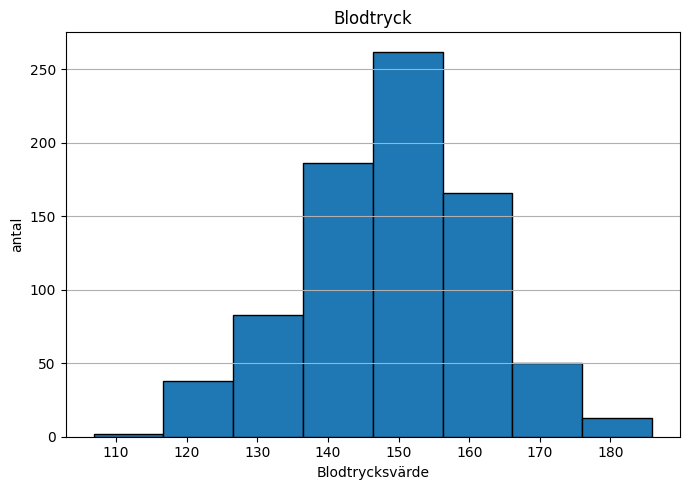

In [6]:
fig, ax = (plt.subplots())
V.histogram(ax, df["systolic_bp"], title = "Blodtryck", xlabel = "Blodtrycksvärde" )
plt.show()

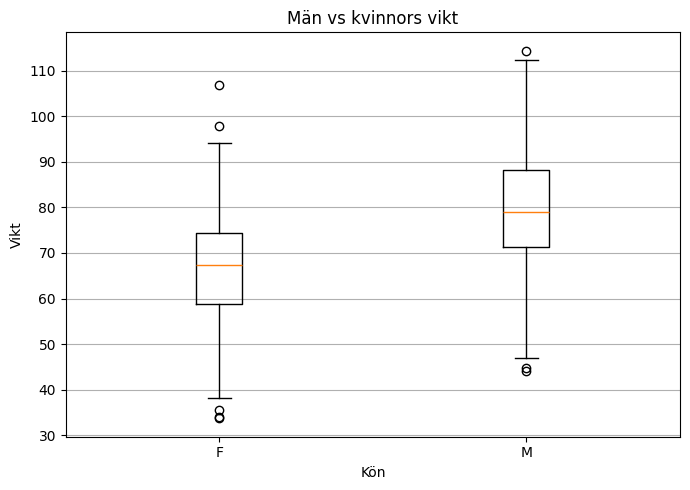

In [7]:
fig, ax = (plt.subplots())
V.boxplot(ax, [df.loc[df.sex == "F", "weight"], df.loc[df.sex == "M", "weight"]], ["F", "M"], "Män vs kvinnors vikt", "Kön", "Vikt")
plt.show()

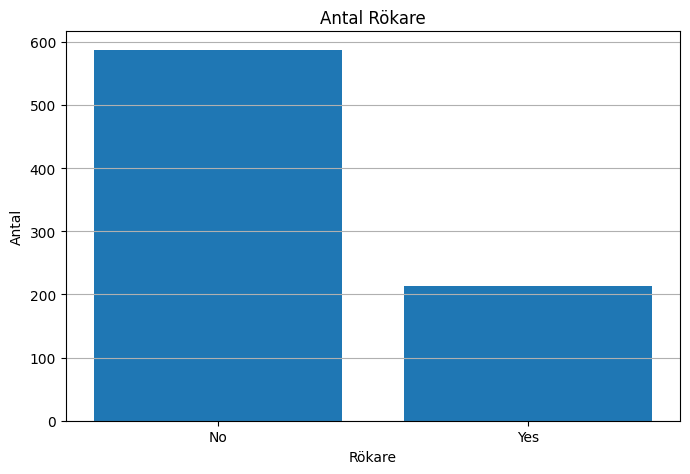

In [8]:
smoker = (df.groupby("smoker", observed= True)["id"]
          .count()
          .reset_index()
          )

fig, ax = plt.subplots()
V.bar(ax, smoker.smoker, smoker.id, "Antal Rökare", "Rökare", "Antal")
plt.tight_layout()
plt.show()

# pd.crosstab(den här , den andra) # När man ska jämföra t.ex. rökare och åldersspann

## Simulering

In [ ]:
verklig_andel = df["disease"].mean()

# Simulering 

np.random.seed(42)
n = 1000
sim = np.random.choice([0.0, 1.0], p = [1-verklig_andel, verklig_andel], size = n)
simulerad_andel = sim.mean()


print(f"Andel personer som har sjukdomen: {verklig_andel:.2%}")
print(f"Simulerad andel personer som har sjukdomen: {simulerad_andel:.2%}")

Andel personer som har sjukdomen: 5.88%
Simulerad andel personer som har sjukdomen: 5.60%


<Figure size 700x500 with 0 Axes>

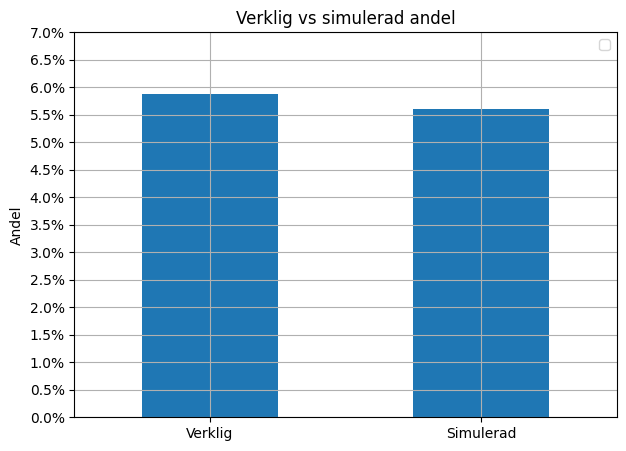

In [ ]:
jämf = pd.Series(
    [verklig_andel, simulerad_andel],
    index=["Verklig", "Simulerad"]
).reset_index()

plt.figure()
jämf.plot(kind="bar")
plt.ylabel("Andel")
plt.title("Verklig vs simulerad andel")
plt.xticks([0,1], ["Verklig", "Simulerad"], rotation= 0)
plt.gca().set_yticks(np.arange(0, 0.07, 0.005))
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x:.1%}")
plt.legend("")
plt.show()

## Konfidensintervall för systolic blodpressure 

### Normal approximation

In [11]:
np.random.seed(123)

n = 40 
stick= np.random.choice(df.systolic_bp, size= n)

mean_stick=float(np.mean(stick))
s = float(np.std(stick,ddof=1))
n=len(stick)
se = s/np.sqrt(n) 

mean_stick, s ,n, se


# n_boot = 10_000 
# obs_diff = 
# boot_diffs = np.empty(n_boot)
# for i in range (n_boot):



(149.27, 13.590950986518518, 40, np.float64(2.148918034255545))

In [12]:
from math import sqrt

mean_bp = df.systolic_bp.mean()

def ci_mean_normal(x, confidence=0.95):
    """
    95%-CI för medel med normal-approximation:
    medel ± 1.96 * (s / sqrt(n))
    """
    x = np.asarray(x, dtype=float)
    mean_x = float(np.mean(x))
    s = float(np.std(x, ddof=1))
    n = len(x)

    z_critical = 1.96
    half_width = z_critical + s/sqrt(n)
    lo, hi = mean_x- half_width, mean_x + half_width
    return lo, hi, mean_x, s, n 

lo, hi, mean_stick, s, n = ci_mean_normal(stick)
print (f"Medelvärde finns inom blodtryck: {lo:.2f}, {hi:.2f} \n"
       f"Medelvärde för stickprov: {mean_stick:.2f} \n"
       f"Medelvärde från data: {mean_bp:.2f} \n" 
       f"Standard error: {s:.2f}")
    

Medelvärde finns inom blodtryck: 145.16, 153.38 
Medelvärde för stickprov: 149.27 
Medelvärde från data: 149.18 
Standard error: 13.59


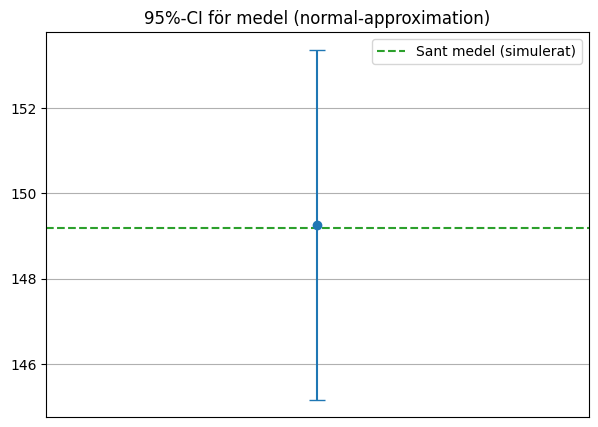

In [13]:
fig, ax = plt.subplots()
ax.errorbar([0], [mean_stick], yerr=[[mean_stick - lo], [hi - mean_stick]], fmt="o", capsize=6)
ax.axhline(mean_bp, color="tab:green", linestyle="--", label="Sant medel (simulerat)")
ax.set_xticks([])
ax.grid(True, axis="y")
ax.legend()
ax.set_title("95%-CI för medel (normal-approximation)")
plt.show()

## Bootstrap test 

In [14]:
def ci_mean_bootstrap(x, B= 5000, confidence = 0.95):
    x = np.array(x, dtype = float)
    n = len(x)
    boot_means = np.empty(B)
    for b in range(B):
        boot_sample =  np.random.choice(x, size= n, replace=True)
        boot_means[b] = np.mean(boot_sample)

    alpha = (1 - confidence) / 2
    lo, hi = np.percentile(boot_means, [100*alpha, 100*(1 - alpha) ])
    return float(lo), float(hi), float(np.mean(x)), 
b_lo, b_hi, b_mean= ci_mean_bootstrap(stick)
f"Mellan {b_lo:.2f} - {b_hi:.2f} kommer medelvärdet finnas 95% av gångerna, bootstrap medelvärde: {b_mean:.2f}, medelvärde från stickprov {float(mean_bp):.2f}"


'Mellan 145.13 - 153.47 kommer medelvärdet finnas 95% av gångerna, bootstrap medelvärde: 149.27, medelvärde från stickprov 149.18'

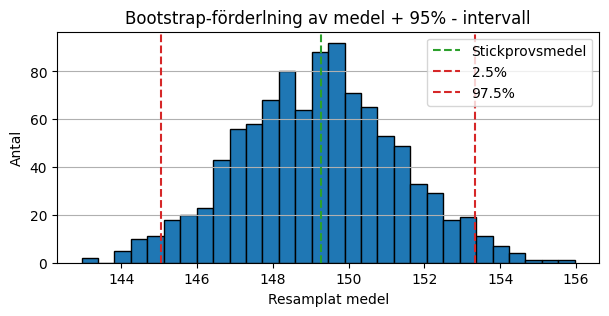

In [15]:
fig, ax = plt.subplots(figsize= (7,3))
boot_info = np.array([np.mean(np.random.choice(stick, size=len(stick), replace= True)) for _ in range(1000)])

ax.hist(boot_info, bins = 30, edgecolor = "black")
ax.axvline(np.mean(stick), color="tab:green", linestyle="--", label="Stickprovsmedel")
ax.axvline(np.percentile(boot_info, 2.5), color="tab:red", linestyle="--", label="2.5%")
ax.axvline(np.percentile(boot_info, 97.5), color="tab:red", linestyle="--", label="97.5%")
ax.set_title("Bootstrap-förderlning av medel + 95% - intervall")
ax.set_xlabel("Resamplat medel")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
plt.legend()
plt.show()

In [16]:
print(f"Normal-CI: {lo:.2f}, {hi:.2f}")
print(f"Bootstrap-CI: {b_lo:.2f}, {b_hi:.2f}")
print("Stickprovsmedel:", mean_stick, "\nMedelvärde från original data:", mean_bp)

Normal-CI: 145.16, 153.38
Bootstrap-CI: 145.13, 153.47
Stickprovsmedel: 149.27 
Medelvärde från original data: 149.178625


In [17]:
def covers_true_mean(method = "normal", n=40, trials=200):
    hits = 0
    for _ in range(trials):
        sample = np.random.choice(df.systolic_bp, size=n, replace=True)
        if method == "normal":
            lo, hi, *_ = ci_mean_normal(sample)
        else:
            lo, hi, *_ = ci_mean_bootstrap(sample, B=1500)
        hits += (lo <= mean_bp <= hi)
    return hits / trials


cov_normal = covers_true_mean("normal", n=40, trials=200)
cov_boot = covers_true_mean("bootstrap", n=40, trials=200)

cov_normal, cov_boot

(np.float64(0.965), np.float64(0.93))

Skriv en jämförelse om Normal CI vs Bootstrap här. 

# Hypotesprövning
### Hypotes: Rökare har högre medel-blodtryck än icke-rökare.

In [38]:
smoke_summary = df.groupby("smoker")["systolic_bp"].agg(
    observations = "count",
    proportions = "mean"
).reset_index()

display(smoke_summary)

C:\Users\elin_\AppData\Local\Temp\ipykernel_21928\2304755978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_summary = df.groupby("smoker")["systolic_bp"].agg(


,smoker,observations,proportions
0,No,587,149.052981
1,Yes,213,149.524883


In [39]:
from scipy import stats

non_smoker = df.loc[df.smoker == "No", "systolic_bp"].values
is_smoker = df.loc[df.smoker == "Yes", "systolic_bp"].values

t_stat, p_val = stats.ttest_ind(non_smoker, is_smoker, equal_var=True)
t_stat_w, p_val_w = stats.ttest_ind(non_smoker, is_smoker, equal_var=False)

print(f"Standard t-test: t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"   Welch t-test: t = {t_stat_w:.3f}, p = {p_val_w:.4f}")

Standard t-test: t = -0.461, p = 0.6450
   Welch t-test: t = -0.450, p = 0.6527


Det finns ingen betydande skillnad i blodtryck mellan rökare och icke rökare.